# Credit Card Fraud Detection with imbalanced dataset
* The datasets contains transactions made by credit cards in September 2013 by european cardholders.
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. * The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
* It contains only numerical input variables which are the result of a PCA transformation and 'Time' and 'Amount'
* https://www.kaggle.com/mlg-ulb/creditcardfraud

In [13]:
import numpy as np # linear algebra
import pandas as pd # data pr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./creditcard.csv')

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# check null vaule 

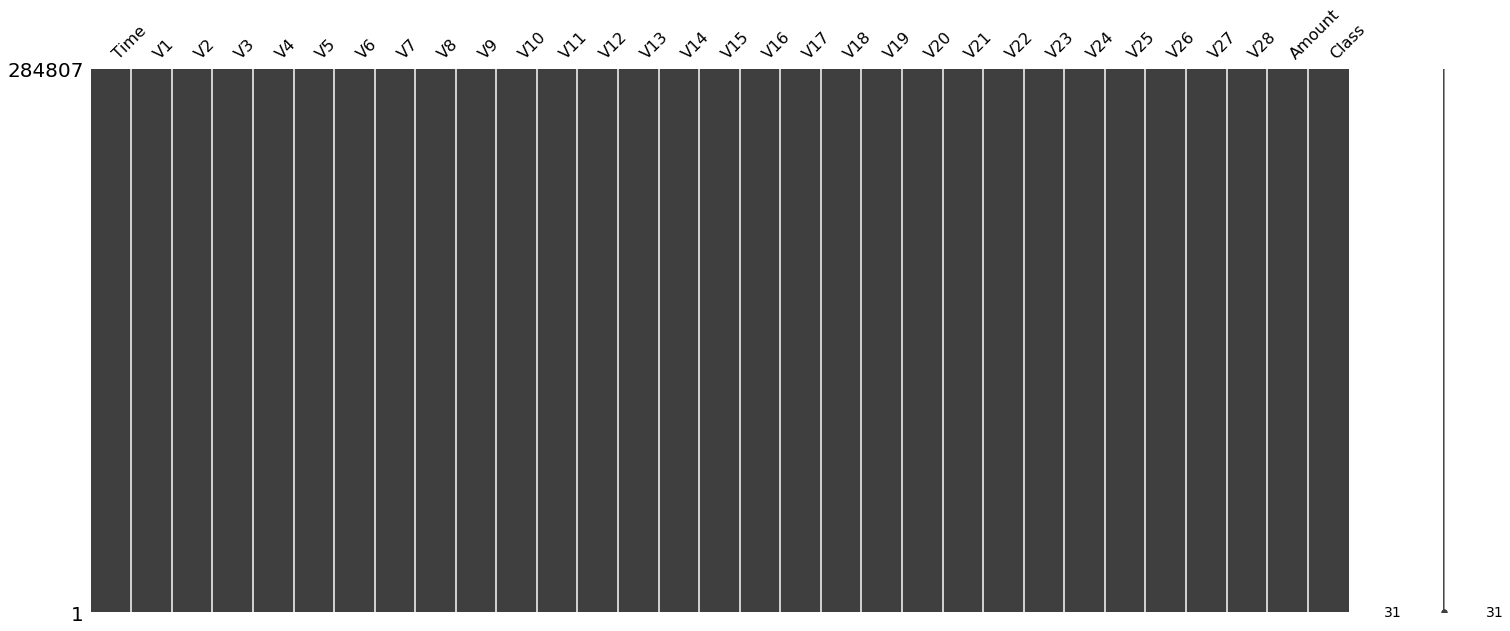

In [7]:
import missingno as msno
%matplotlib inline
msno.matrix(df)
# there is no null value 

# check distribution of each variable 

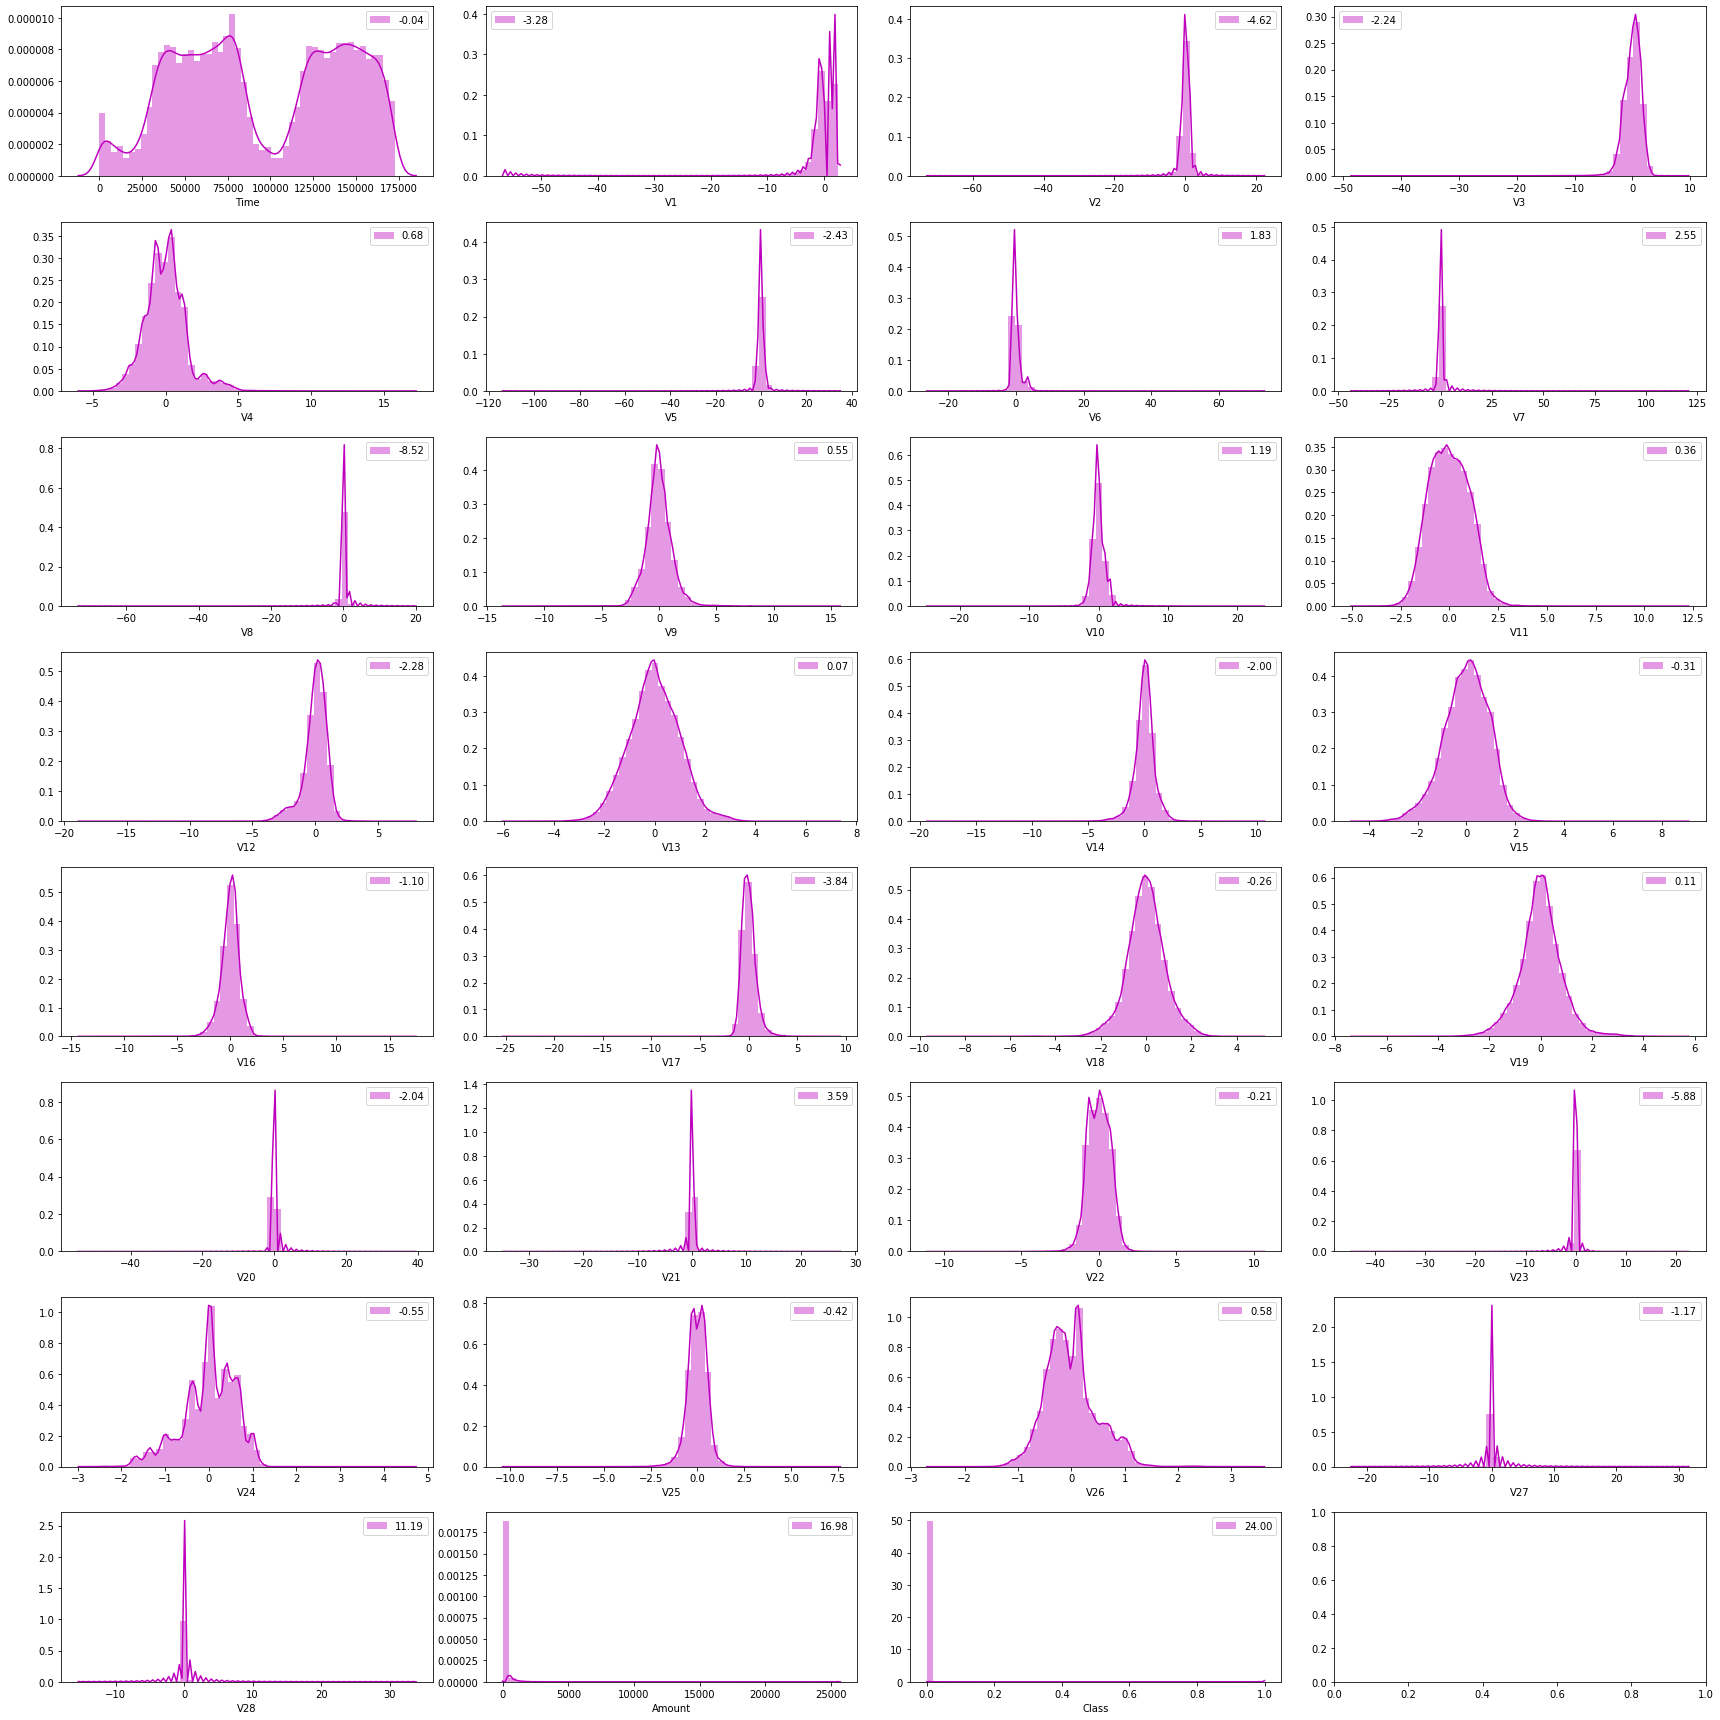

In [15]:
num_rows, num_cols = 8,4

f, axes = plt.subplots(nrows=8, ncols=4, figsize=(24, 24))
#f.suptitle('Distribution of Features', fontsize=16)

for index, column in enumerate(df.columns):
    i,j = (index // num_cols, index % num_cols)
    g = sns.distplot(df[column], color="m", label="%.2f"%(df[column].skew()), ax=axes[i,j])
    g = g.legend(loc="best")


plt.tight_layout()
plt.show()

* Most of the people were not-fraud and only 492 people were identified as fraud. This indicates high level of imbalance in the dataset

# SMOTE
* SMOTE should be applied to only training dataset and not the whole dataset because we will need to test the model on the actual dataset

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(['Class'], axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)
print("Shape of the X_train before applying SMOTE is: ", X_train.shape)
print("Shape of the y_train data before applying SMOTE is: ", y_train.shape)
print("Shape of the X_test before applying SMOTE is: ", X_test.shape)
print("Shape of the y_test before applying SMOTE is: ", y_test.shape)

print("Before applying SMOTE the count of the fraud cases are: ", y_train.value_counts().values[1])
print("Before applying SMOTE the count of the non-fraud cases are: ", y_train.value_counts().values[0])


Shape of the X_train before applying SMOTE is:  (227845, 30)
Shape of the y_train data before applying SMOTE is:  (227845,)
Shape of the X_test before applying SMOTE is:  (56962, 30)
Shape of the y_test before applying SMOTE is:  (56962,)
Before applying SMOTE the count of the fraud cases are:  394
Before applying SMOTE the count of the non-fraud cases are:  227451


In [21]:
sm = SMOTE(random_state = 2)
X_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

print("Shape of the X_train after applying SMOTE is: ", X_train_s.shape)
print("Shape of the y_train data after applying SMOTE is: ", y_train_s.shape)
print("After applying SMOTE the count of the fraud cases are: ", sum(y_train_s == 1))
print("After applying SMOTE the count of the non-fraud cases are: ", sum(y_train_s == 0))

Shape of the X_train after applying SMOTE is:  (454902, 30)
Shape of the y_train data after applying SMOTE is:  (454902,)
After applying SMOTE the count of the fraud cases are:  227451
After applying SMOTE the count of the non-fraud cases are:  227451


# Logistic Regression with SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, roc_auc_score

In [24]:
def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['Non-Fraud', 'Fraud']
    print(classification_report(y_actual, predicted, target_names = labels))

/Users/haoran/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     56864
       Fraud       0.08      0.87      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.98      0.99     56962



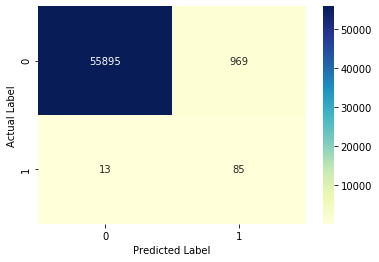

In [25]:
lr_smote = LogisticRegression(max_iter = 1000)
lr_smote.fit(X_train_s, y_train_s)

predicted_lr_smote = lr_smote.predict(X_test)
evaluation(y_test, predicted_lr_smote)

Text(0.5, 1.0, 'Precision Recall Curve')

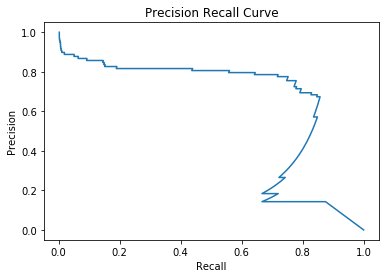

In [26]:
y_pred_prob = lr_smote.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators = 1000, verbosity = 1, scale_pos_weight = 580)

xgbc.fit(X_train, y_train)

pred_xgb = xgbc.predict(X_test)

evaluation(y_test, pred_xgb)